# Regressão Logística

In [1]:
eleicao <- read.csv("dados/Eleicao.csv", sep = ";", header = TRUE)
head(eleicao)

CANDIDATO,SITUACAO,DESPESAS
<fct>,<int>,<int>
George Turner,0,10
Victor Johnson,0,100
Jerry Perry,1,1600
Shirley Cook,1,1500
Carolyn Bailey,1,3300
Susan Sanders,0,200


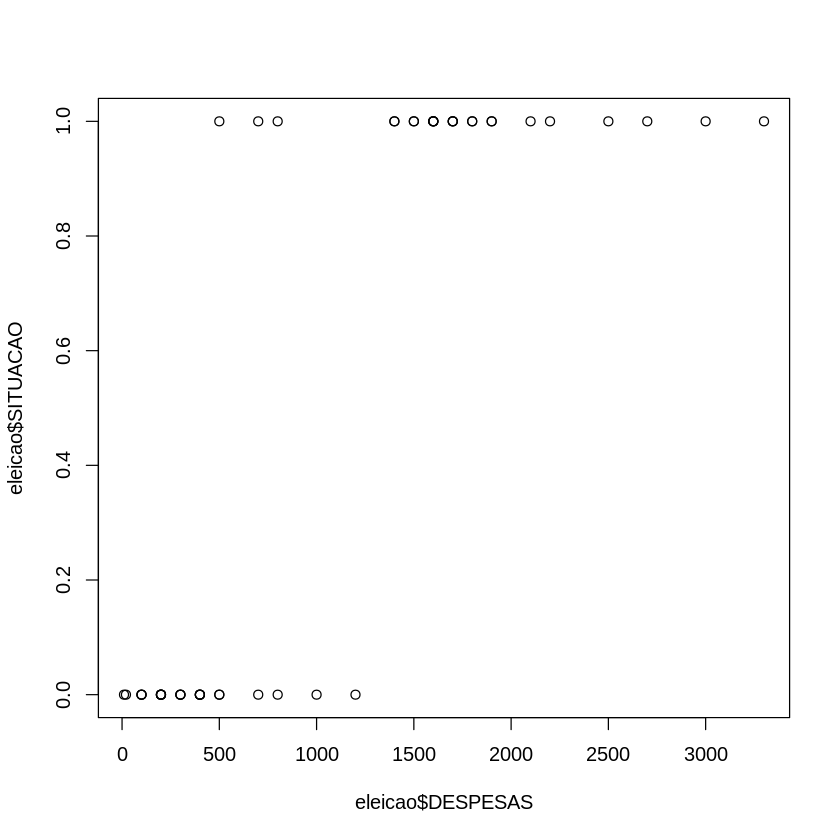

In [2]:
plot(eleicao$DESPESAS, eleicao$SITUACAO)

In [3]:
summary(eleicao)

             CANDIDATO     SITUACAO         DESPESAS   
  Gary Peterson   : 1   Min.   :0.0000   Min.   :  10  
  Pamela Bryant   : 1   1st Qu.:0.0000   1st Qu.: 300  
 Andrea Washington: 1   Median :1.0000   Median : 800  
 Annie Brooks     : 1   Mean   :0.5106   Mean   :1086  
 Anthony Harris   : 1   3rd Qu.:1.0000   3rd Qu.:1700  
 Barbara White    : 1   Max.   :1.0000   Max.   :3300  
 (Other)          :41                                  

### Correlação

In [4]:
cor(eleicao$DESPESAS, eleicao$SITUACAO)

[1] 0.8121872

### Modelo de regressão logística

In [5]:
modelo <- glm(SITUACAO ~ DESPESAS, data = eleicao, family = "binomial")
modelo


Call:  glm(formula = SITUACAO ~ DESPESAS, family = "binomial", data = eleicao)

Coefficients:
(Intercept)     DESPESAS  
  -4.602880     0.004984  

Degrees of Freedom: 46 Total (i.e. Null);  45 Residual
Null Deviance:	    65.13 
Residual Deviance: 18.54 	AIC: 22.54

In [6]:
summary(modelo)


Call:
glm(formula = SITUACAO ~ DESPESAS, family = "binomial", data = eleicao)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.79020  -0.29574   0.00379   0.20326   2.10968  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.602880   1.315934  -3.498 0.000469 ***
DESPESAS     0.004984   0.001404   3.550 0.000385 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 18.540  on 45  degrees of freedom
AIC: 22.54

Number of Fisher Scoring iterations: 7


### Visualizando os dados e o ajuste do modelo

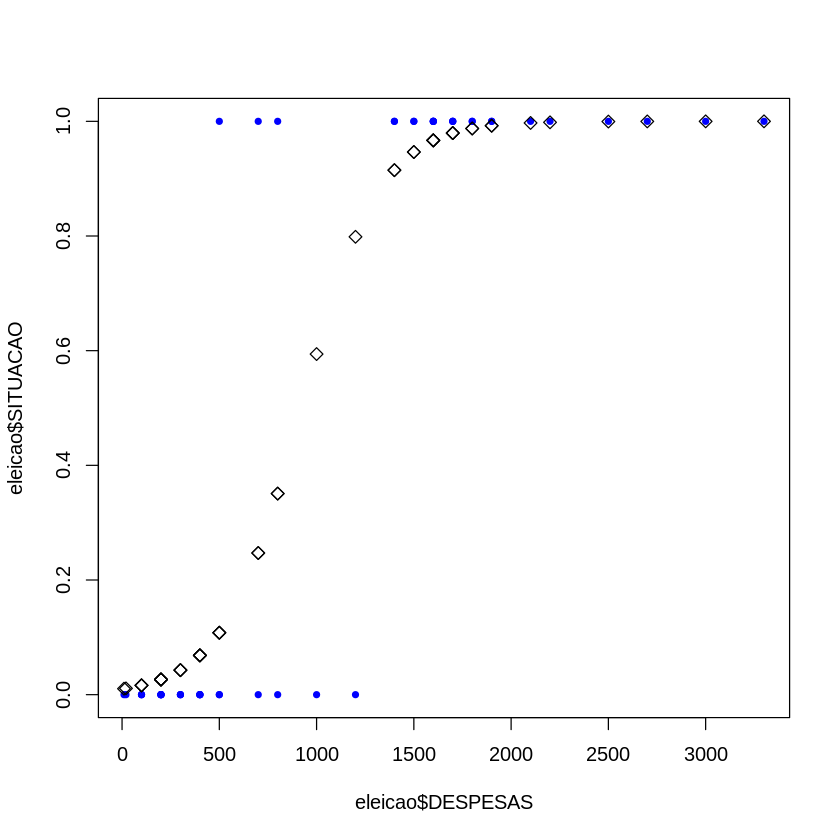

In [8]:
plot(eleicao$DESPESAS, eleicao$SITUACAO, col = "blue", pch = 20)
points(eleicao$DESPESAS, modelo$fitted, pch = 5)

### Prevendo a probabilidade dos novos candidatos serem eleitos

In [10]:
novaEleicao <- read.csv("dados/NovosCandidatos.csv", sep = ";", header = T)
novaEleicao

CANDIDATO,DESPESAS
<fct>,<int>
A,0
B,10
C,200
D,500
E,900
F,1500
G,3000


In [11]:
novaEleicao$RESULTADO <- predict(modelo, newdata = novaEleicao, type = "response")
novaEleicao

CANDIDATO,DESPESAS,RESULTADO
<fct>,<int>,<dbl>
A,0,0.009923466
B,10,0.010425261
C,200,0.026438255
D,500,0.108027149
E,900,0.470635921
F,1500,0.946475247
G,3000,0.999967947
